In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
#import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
#import file
banks_ori_df = pd.read_csv('data/bank/bank-full.csv', sep=';')
banks_ext_df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

In [3]:
# number of rows and cols
print('\nShape of dataframe')
print('Original DF:', banks_ori_df.shape)
print('Extended DF:', banks_ext_df.shape)


Shape of dataframe
Original DF: (45211, 17)
Extended DF: (41188, 21)


In [4]:
print('\nColumn Types | Original Df:\n')
print(banks_ori_df.head())
print('\nColumn Types | _Extended Df\n')
print(banks_ext_df.head())


Column Types | Original Df:

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Column Types | _Extended Df

   age        job  marital    education  default ho

In [5]:
#check null rows - inverse of non-null values
print('\n# of Null Rows | Origianl Df:')
print(banks_ori_df.isnull().sum())
print('\n# of Null Rows | Extended Df:')
print(banks_ext_df.isnull().sum())


# of Null Rows | Origianl Df:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# of Null Rows | Extended Df:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# column types
print('\nColumn Types and Non-null Values')
print('__Original DF:__\n', banks_ori_df.info())
print('\n__Extended DF:__\n', banks_ext_df.info())


Column Types and Non-null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
__Original DF:__
 None
<class 'pandas.core.frame.DataFrame'>
Rang

In [7]:
# Make list of categorical and numerical columns

ori_categorical_cols = banks_ori_df.select_dtypes(include=['object', 'category']).columns
ori_noncategorical_cols = banks_ori_df.drop(columns=ori_categorical_cols).columns

ext_categorical_cols = banks_ext_df.select_dtypes(include=['object', 'category']).columns
ext_noncategorical_cols = banks_ext_df.drop(columns=ext_categorical_cols).columns

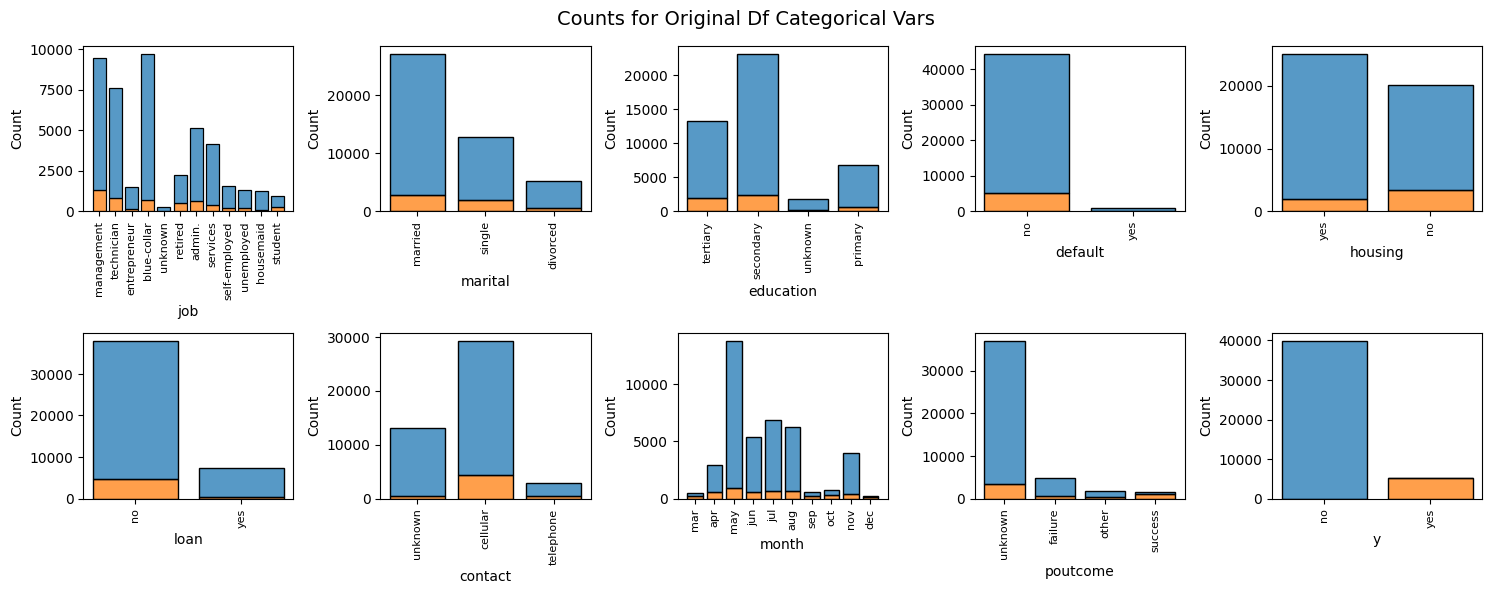


Categorical Values by Column | Original Df:

Values for Original DF column : job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
               Count  Percentage
job                             
blue-collar     9732       21.53
management      9458       20.92
technician      7597       16.80
admin.          5171       11.44
services        4154        9.19
retired         2264        5.01
self-employed   1579        3.49
entrepreneur    1487        3.29
unemployed      1303        2.88
housemaid       1240        2.74
student          938        2.07
unknown          288        0.64

Values for Original DF column : marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
          Count  Percentage
marital          

In [8]:
# print facetted barplots for categorical values

# reorder months
custom_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
banks_ori_df['month'] = pd.Categorical(banks_ori_df['month'], categories=custom_order, ordered=True)

max_cols = 5
max_rows = 2
fig_ori_dist, axes = plt.subplots(ncols=max_cols, nrows=max_rows, figsize=(15, 6))

x_counter = 0
y_counter = 0
for i, col in enumerate(ori_categorical_cols):
    sns.histplot(data=banks_ori_df, x=col, hue='y', ax=axes[y_counter, x_counter], multiple="stack", shrink=0.8)
    axes[y_counter, x_counter].tick_params(axis='x', labelsize=8,  labelrotation=90)
    axes[y_counter, x_counter].get_legend().remove()
    x_counter += 1
    if x_counter == max_cols:
        x_counter = 0
        y_counter += 1
    if i == len(ori_categorical_cols) :
        break

fig_ori_dist.suptitle("Counts for Original Df Categorical Vars", fontsize=14)
plt.tight_layout(pad=1)
plt.show()


#  print value counts
print('\nCategorical Values by Column | Original Df:')
for i, col in enumerate(ori_categorical_cols):
    banks_ori_df[col] = banks_ori_df[col].astype('category')
    val_counts = banks_ori_df[col].value_counts()

    val_percent = banks_ori_df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        'Count': val_counts,
        'Percentage': val_percent.round(2) 
    })
    
    print(f"\nValues for Original DF column : {val_counts}")
    print(summary)

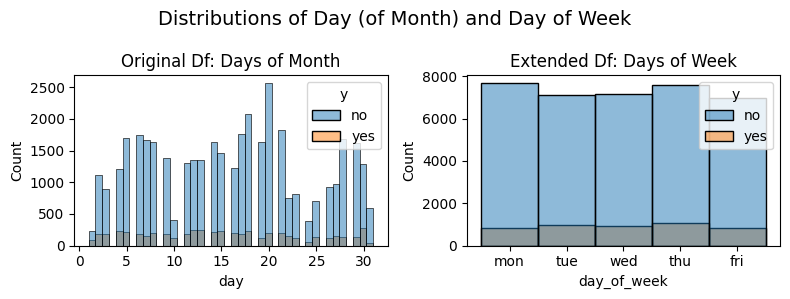

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(data=banks_ori_df, x="day", hue="y", ax=ax1)
ax1.set_title("Original Df: Days of Month")

sns.histplot(data=banks_ext_df, x="day_of_week", hue="y", ax=ax2)
ax2.set_title("Extended Df: Days of Week")


fig.suptitle("Distributions of Day (of Month) and Day of Week", fontsize=14)
plt.tight_layout()
plt.show()

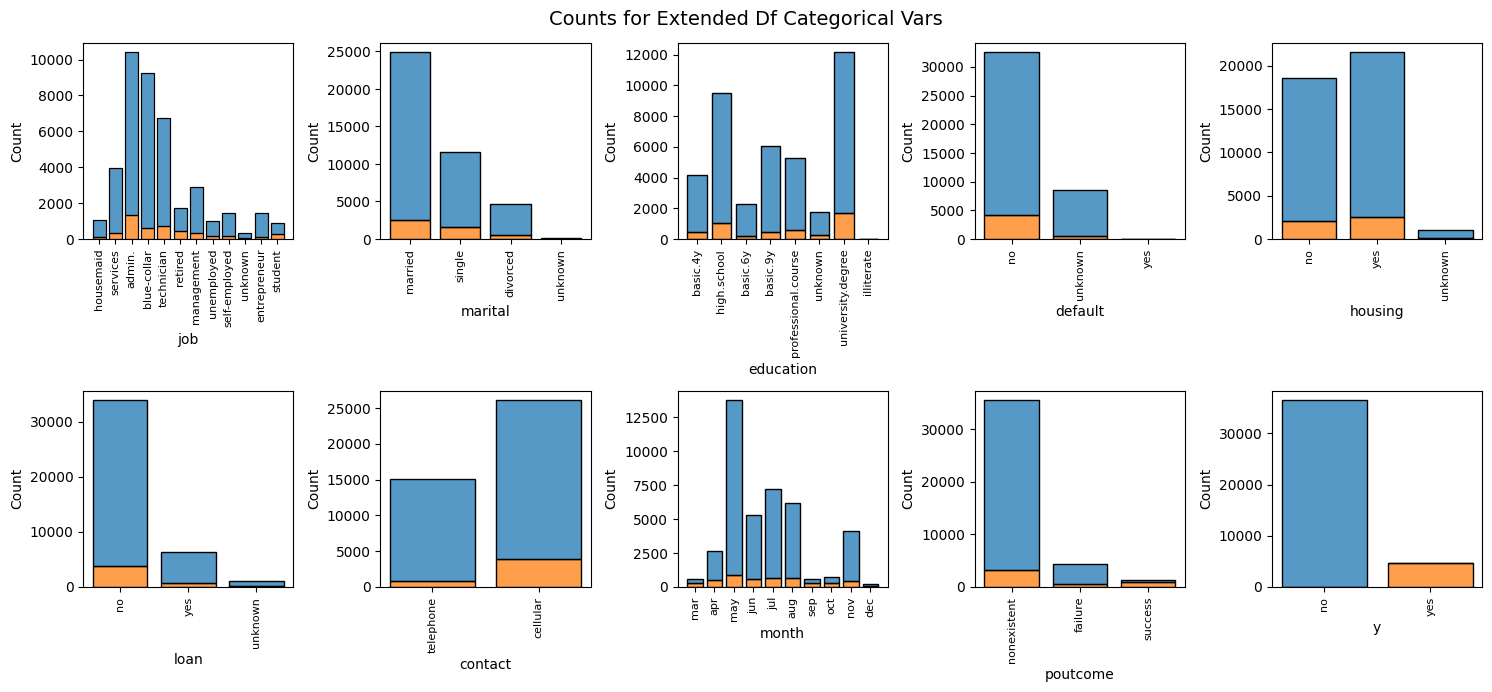


Categorical Values by Columns | Original Df:


📊 Full Breakdown for 'job' by target 'y'
y                no   yes  total   % no  % yes    % total
job                                                      
admin.         9070  1352  10422  87.03  12.97  25.303486
blue-collar    8616   638   9254  93.11   6.89  22.467709
entrepreneur   1332   124   1456  91.48   8.52   3.535010
housemaid       954   106   1060  90.00  10.00   2.573565
management     2596   328   2924  88.78  11.22   7.099155
retired        1286   434   1720  74.77  25.23   4.175974
self-employed  1272   149   1421  89.51  10.49   3.450034
services       3646   323   3969  91.86   8.14   9.636302
student         600   275    875  68.57  31.43   2.124405
technician     6013   730   6743  89.17  10.83  16.371273
unemployed      870   144   1014  85.80  14.20   2.461882
unknown         293    37    330  88.79  11.21   0.801204

📊 Full Breakdown for 'marital' by target 'y'
y            no   yes  total   % no  % yes    % total

In [10]:

# split of engineered columns
ext_noncategorical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
ext_engineered_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

banks_ext_simplified_df = banks_ext_df.drop(columns=ext_engineered_cols)
banks_ext_simplified_df = banks_ext_simplified_df.drop(columns=['day_of_week'])

custom_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
banks_ext_simplified_df['month'] = pd.Categorical(banks_ext_simplified_df['month'], categories=custom_order, ordered=True)

     
ext_categorical_cols = banks_ori_df.select_dtypes(include=['object', 'category']).columns


max_cols = 5
max_rows = 2
fig_ext_dist, axes = plt.subplots(ncols=max_cols, nrows=max_rows, figsize=(15, 7))

x_counter = 0
y_counter = 0
for i, col in enumerate(ext_categorical_cols):
    sns.histplot(data=banks_ext_simplified_df, x=col, hue='y', ax=axes[y_counter, x_counter], multiple="stack", shrink=0.8)
    axes[y_counter, x_counter].tick_params(axis='x', labelsize=8,  labelrotation=90)
    axes[y_counter, x_counter].get_legend().remove()
    #axes[i].set_title(f'Countplot for {col}')
    x_counter += 1
    if x_counter == max_cols:
        x_counter = 0
        y_counter += 1
    if i == len(ext_categorical_cols) :
        break


fig_ext_dist.suptitle("Counts for Extended Df Categorical Vars", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

# Combine into a single summary table
print('\nCategorical Values by Columns | Original Df:\n')
for i, col in enumerate(ext_categorical_cols):
    banks_ext_df[col] = banks_ext_df[col].astype('category')
    val_counts = banks_ext_df[col].value_counts()

    print(f"\n📊 Full Breakdown for '{col}' by target 'y'")

    # Crosstab: raw counts
    count_table = pd.crosstab(banks_ext_df[col], banks_ext_df['y'])
    count_table['total'] = banks_ext_df[col].value_counts()
    count_table['% no'] = (count_table['no'] / count_table['total'] * 100).round(2)
    count_table['% yes'] = (count_table['yes'] / count_table['total'] * 100).round(2)
    count_table['% total'] = banks_ext_df[col].value_counts(normalize=True) * 100

    # Rename columns for clarity
    count_table = count_table.rename(columns={'n': 'Count (n)', 'y': 'Count (y)'})

    print(count_table)

In [11]:
# drop days
ori_noncategorical_cols = ['age', 'duration', 'balance', 'campaign', 'pdays', 'previous']
banks_ori_simplified_df = banks_ori_df.drop(columns=['day'])

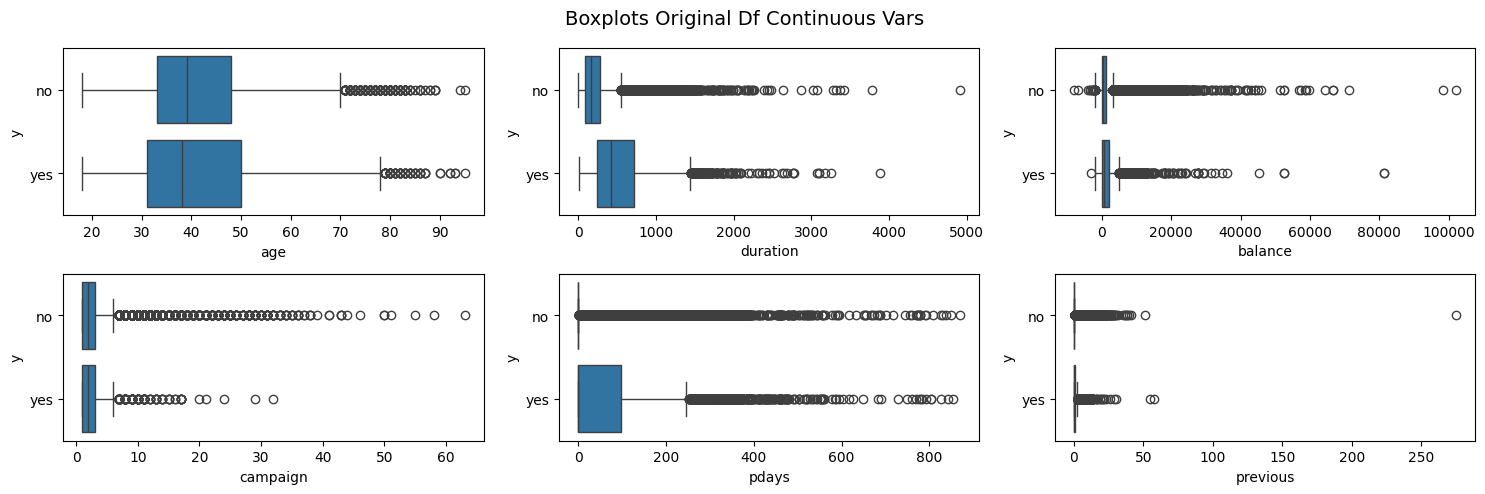


Summary metrics for numerical fields | Original Df
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -

In [12]:
#Boxplots 
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 5))
x_counter = 0
y_counter = 0
for i, col in enumerate(ori_noncategorical_cols):
    sns.boxplot(data=banks_ori_df, x=col, y='y', ax=axes[y_counter, x_counter])
    #axes[i].set_title(f'Countplot for {col}')
    #axes[i].tick_params(axis='x', rotation=45)
    x_counter += 1
    if x_counter == 3:
        x_counter = 0
        y_counter += 1
    if i == len(ori_noncategorical_cols) :
        break

fig.suptitle("Boxplots Original Df Continuous Vars", fontsize=14)
plt.tight_layout()
plt.show()

# df summary
print('\nSummary metrics for numerical fields | Original Df')
print(banks_ori_df.describe())

for i, col in enumerate(ori_noncategorical_cols):
        
    top_values = banks_ori_df.nlargest(5, col)
    
    print(f'\nTop 5 `{col}`', top_values[col])
    Q1 = banks_ori_df[col].quantile(0.25)
    Q3 = banks_ori_df[col].quantile(0.75)
    upper_whisker =  Q3 + 1.5 * (Q3 - Q1)
    
    print(f'\nUpper Whisker: `{col}`', upper_whisker)
    count_above_whisker = (banks_ori_df[col] > upper_whisker).sum()
    print("Count above upper whisker:", count_above_whisker)

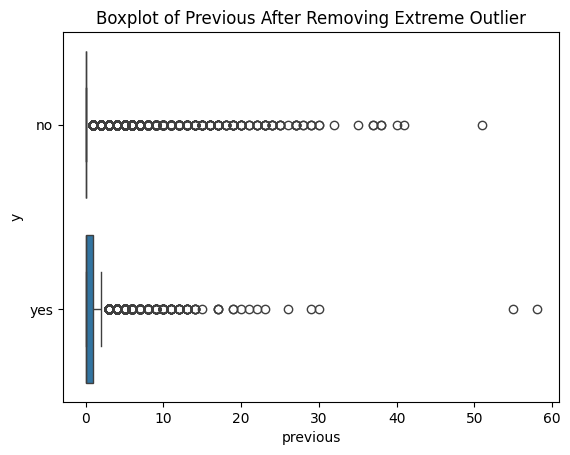

count    45210.000000
mean         0.574253
std          1.907928
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64


In [13]:
# Remove extreme outli
df = banks_ori_df[banks_ori_df['previous'] != banks_ori_df['previous'].max()]

sns.boxplot(data=df, x='previous', y='y')
plt.title("Boxplot of Previous After Removing Extreme Outlier")
plt.show()

print(df['previous'].describe())


['age', 'duration', 'campaign', 'pdays', 'previous']

Summary metrics for numerical fields | Extended Df
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593     -0.741988      0.172963   
std       10.42125    259.279249      2.770014      1.510327      0.494901   
min       17.00000      0.000000      1.000000     -1.000000      0.000000   
25%       32.00000    102.000000      1.000000     -1.000000      0.000000   
50%       38.00000    180.000000      2.000000     -1.000000      0.000000   
75%       47.00000    319.000000      3.000000     -1.000000      0.000000   
max       98.00000   4918.000000     56.000000     27.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.5

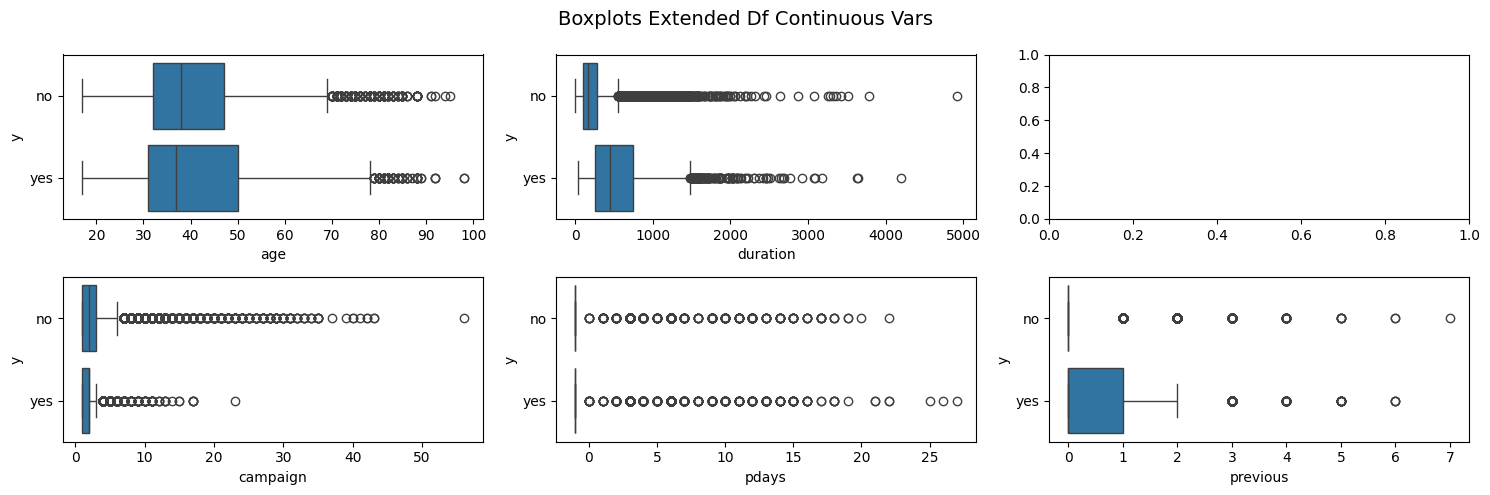

In [14]:
#Boxplots for Ext
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 5))
print(ext_noncategorical_cols)


# recode pdays from 999 to -1 to match original_df
banks_ext_df['pdays'] = banks_ext_df['pdays'].replace(999, -1)

x_counter = 0
y_counter = 0
for i, col in enumerate(ext_noncategorical_cols):
    if x_counter == 2 and y_counter == 0 :
        x_counter = 0
        y_counter = 1
    sns.boxplot(data=banks_ext_df, x=col, y='y', ax=axes[y_counter, x_counter])
    x_counter += 1
    if x_counter == 3:
        x_counter = 0
        y_counter += 1
    if i == len(ext_noncategorical_cols):
        break

fig.suptitle("Boxplots Extended Df Continuous Vars", fontsize=14)
plt.tight_layout()


# df summary

print('\nSummary metrics for numerical fields | Extended Df')
print(banks_ext_df.describe())

for i, col in enumerate(ext_noncategorical_cols):
        
    top_values = banks_ext_df.nlargest(5, col)
    bot_values = banks_ext_df.nsmallest(5, col)
    
    print(f'\nTop 5 `{col}`', top_values[col])
    print(f'\nBottom 5 `{col}`', bot_values[col])
    Q1 = banks_ext_df[col].quantile(0.25)
    Q3 = banks_ext_df[col].quantile(0.75)
    upper_whisker =  Q3 + 1.5 * (Q3 - Q1)
    
    print(f'\nUpper Whisker `{col}`', upper_whisker)
    count_above_whisker = (banks_ext_df[col] > upper_whisker).sum()
    print("Count above upper whisker:", count_above_whisker)

plt.show()

<positron-console-cell-15>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


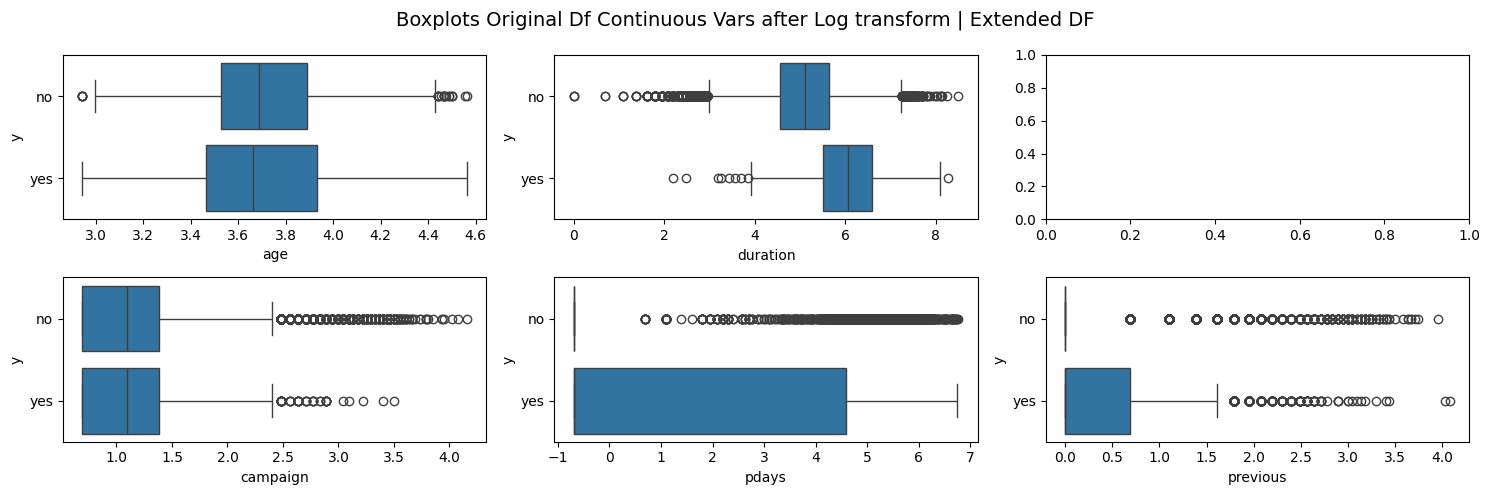

In [15]:
### EXT

# Log transform non-categorical variables

banks_ext_log_df = df
banks_ext_log_df[ext_noncategorical_cols] = banks_ext_log_df[ext_noncategorical_cols].apply(lambda x: np.sign(x) * np.log1p(abs(x)))


fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 5))
x_counter = 0
y_counter = 0

for i, col in enumerate(ext_noncategorical_cols):
    if x_counter == 2 and y_counter == 0 :
        x_counter = 0
        y_counter = 1
    sns.boxplot(data=banks_ext_log_df, x=col, y='y', ax=axes[y_counter, x_counter])

    x_counter += 1
    if x_counter == 3:
        x_counter = 0
        y_counter += 1
    if i == len(ext_noncategorical_cols ) :
        break

fig.suptitle("Boxplots Original Df Continuous Vars after Log transform | Extended DF", fontsize=14)
plt.tight_layout()
plt.show()


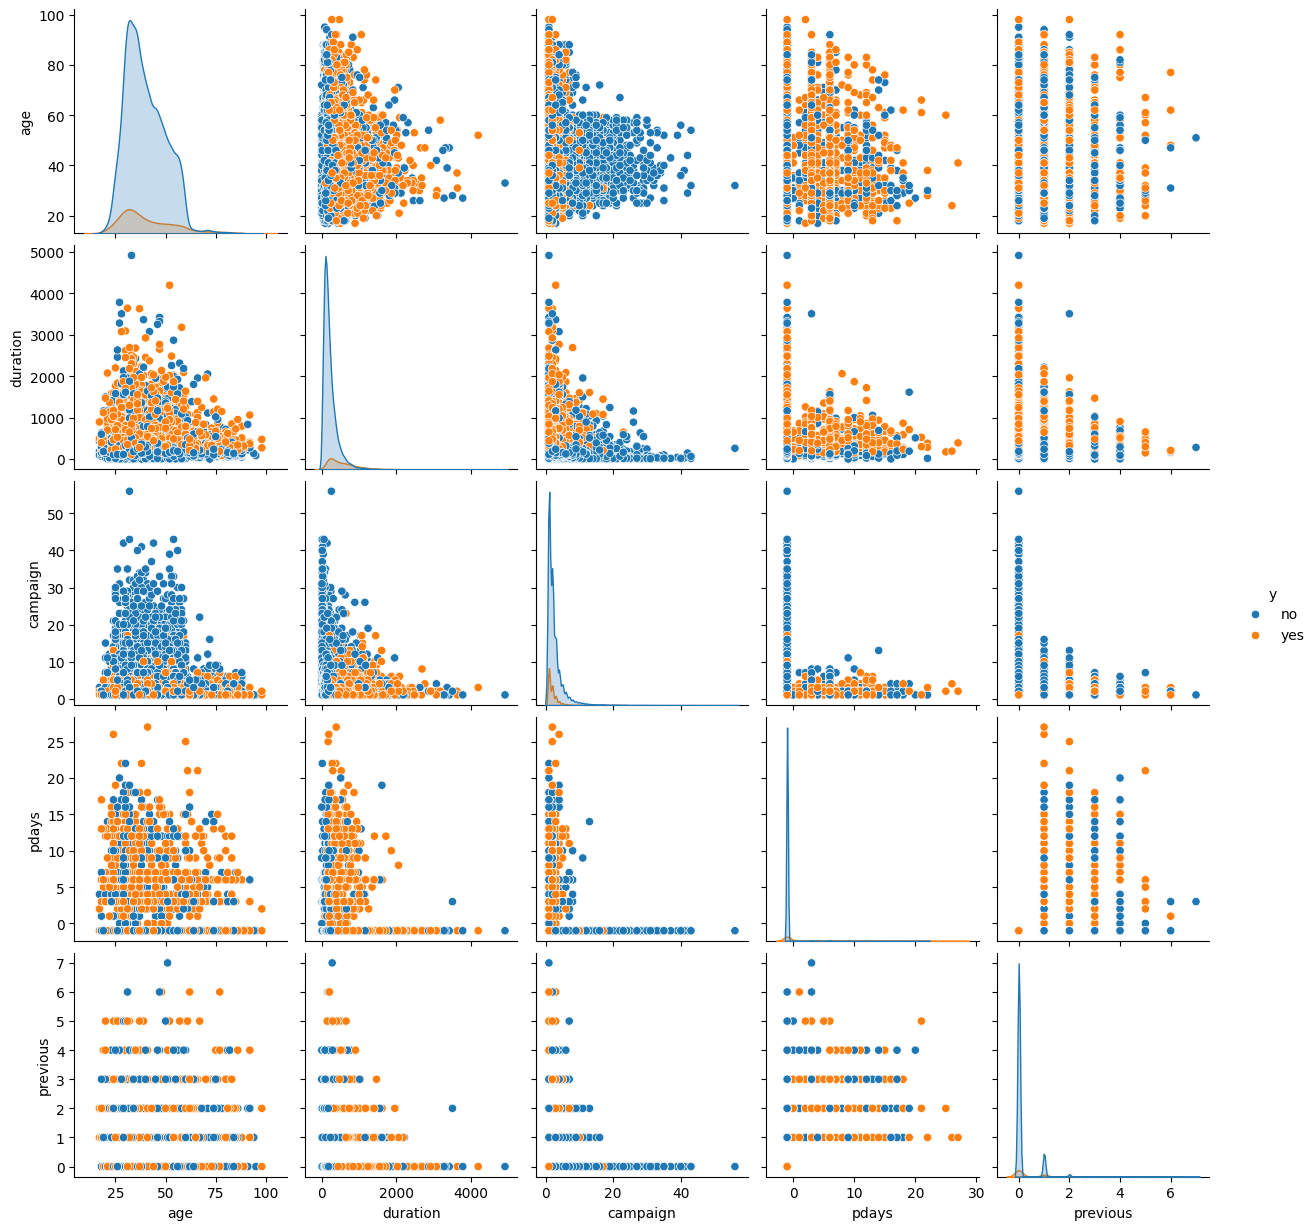

In [16]:
# recode pdays from 999 to -1 to match original_df
banks_ext_simplified_df['pdays'] = banks_ext_simplified_df['pdays'].replace(999, -1)

sns.pairplot(banks_ext_simplified_df, hue='y')


In [17]:
for i, col in enumerate(ext_noncategorical_cols):
    val_counts = df[col].value_counts()
    
    print(f"\n📊 Full Breakdown for '{col}' by target 'y'")
    
    df = banks_ext_df
    if col == 'age' :
        df = banks_ext_df[(banks_ext_df['age'] > 22) & (banks_ext_df['age'] < 61)]
    # Crosstab: raw counts
    count_table = pd.crosstab(df[col], banks_ext_df['y'])
    count_table['total'] = df[col].value_counts()
    count_table['% no'] = (count_table['no'] / count_table['total'] * 100).round(2)
    count_table['% yes'] = (count_table['yes'] / count_table['total'] * 100).round(2)
    count_table['% total'] = df[col].value_counts(normalize=True) * 100
    
    # Rename columns for clarity
    count_table = count_table.rename(columns={'n': 'Count (n)', 'y': 'Count (y)'})

    print(count_table)


📊 Full Breakdown for 'age' by target 'y'
y      no  yes  total   % no  % yes   % total
age                                          
23    178   48    226  78.76  21.24  0.566430
24    377   86    463  81.43  18.57  1.160430
25    505   93    598  84.45  15.55  1.498784
26    576  122    698  82.52  17.48  1.749417
27    737  114    851  86.60  13.40  2.132886
28    850  151   1001  84.92  15.08  2.508835
29   1267  186   1453  87.20  12.80  3.641695
30   1512  202   1714  88.21  11.79  4.295847
31   1727  220   1947  88.70  11.30  4.879822
32   1662  184   1846  90.03   9.97  4.626682
33   1623  210   1833  88.54  11.46  4.594100
34   1561  184   1745  89.46  10.54  4.373543
35   1592  167   1759  90.51   9.49  4.408632
36   1626  154   1780  91.35   8.65  4.461265
37   1338  137   1475  90.71   9.29  3.696835
38   1264  143   1407  89.84  10.16  3.526404
39   1318  114   1432  92.04   7.96  3.589062
40   1077   84   1161  92.76   7.24  2.909847
41   1165  113   1278  91.16   8.84  3

In [18]:
### Prepare data for correlation tests
### by binnign, dropping columns already identifies as misc.
### and one-hot encoding categorical variables

# make dummy varible for contacted status
banks_ext_simplified_df["was_contacted_before"] = (banks_ext_simplified_df["pdays"] != -1).astype(int)
banks_ext_simplified_df["pdays"] = banks_ext_simplified_df["pdays"].replace(-1, np.nan)

education_bins = {
    "basic.4y": "primary",
    "basic.6y": "primary",
    "basic.9y": "secondary",
    "high.school": "secondary",
    "university.degree": "tertiary",
    "professional.course": "other",
    "unknown": "other",
    "illiterate": "other"
}

df = banks_ext_df.drop(["day_of_week", "month", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m","nr.employed"], axis=1)
df["education"] = df["education"].map(education_bins)
df['pdays'] = df['pdays'].replace(999, -1)
banks_onehot_df = pd.get_dummies(df, drop_first=True)




 Correlation Heatmap | Extended Df


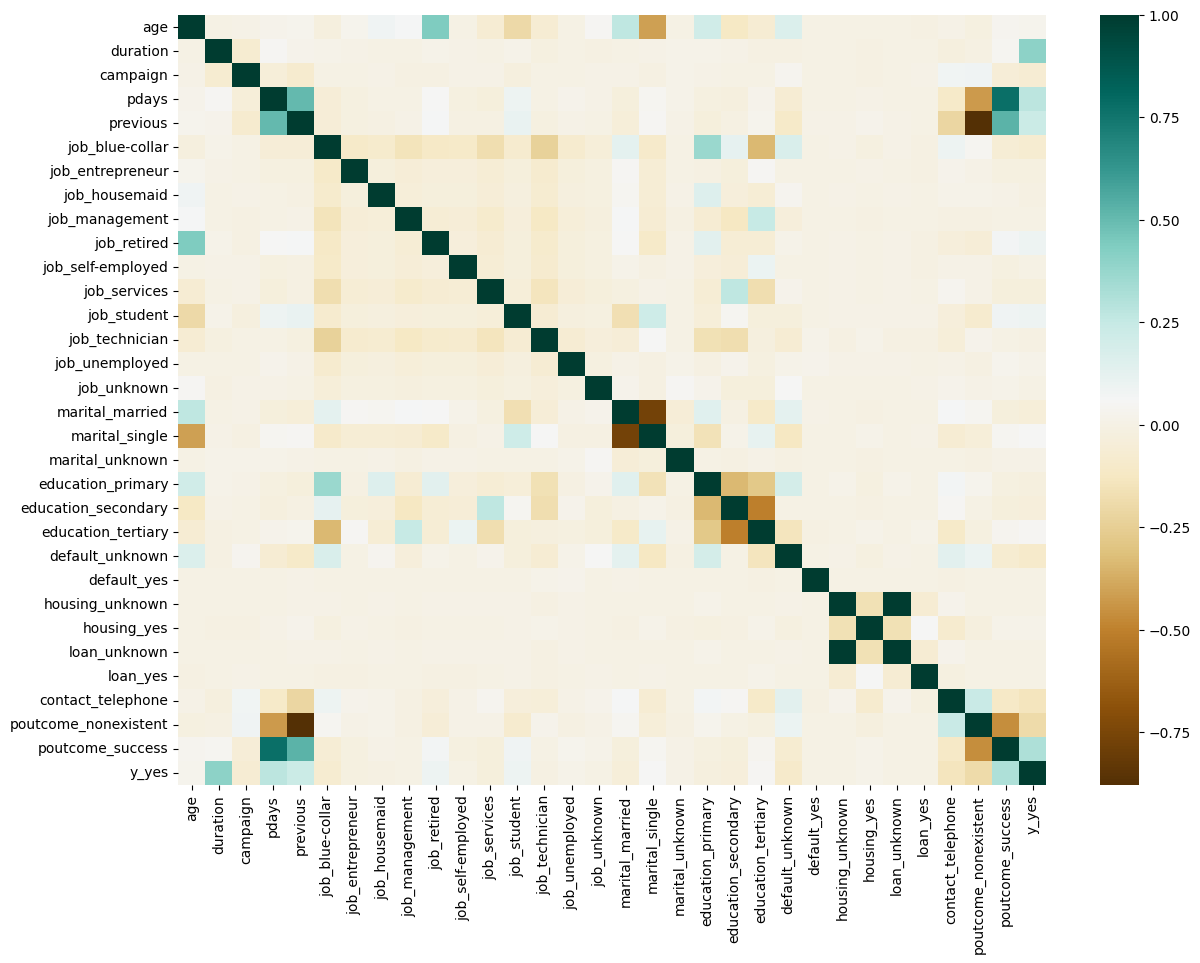

In [19]:
# correlation for all


plt.figure(figsize=(14,10))
c = banks_onehot_df.corr()
sns.heatmap(c, cmap="BrBG", annot=False)

print('\n Correlation Heatmap | Extended Df')


In [20]:
all_corrs = []

for col in c.columns:
    corr_filtered = (
        c[col]
        .drop(col)  # drop self-correlation
        .reset_index()
        .rename(columns={"index": "variable", col: "corr"})
        .sort_values(by="corr", key=abs, ascending=False)
    )
    
    if not corr_filtered.empty:
        corr_filtered.insert(0, "col", col)  # add reference column
        all_corrs.append(corr_filtered)

# Combine all into one DataFrame
corr_summary = pd.concat(all_corrs, ignore_index=True)
corr_summary = corr_summary.sort_values(by="corr", key=abs, ascending=False).reset_index(drop=True)


print(corr_summary.head(40))

                     col              variable      corr
0        housing_unknown          loan_unknown  1.000000
1           loan_unknown       housing_unknown  1.000000
2               previous  poutcome_nonexistent -0.878776
3   poutcome_nonexistent              previous -0.878776
4       poutcome_success                 pdays  0.778275
5                  pdays      poutcome_success  0.778275
6         marital_single       marital_married -0.773785
7        marital_married        marital_single -0.773785
8       poutcome_success              previous  0.524045
9               previous      poutcome_success  0.524045
10              previous                 pdays  0.506531
11                 pdays              previous  0.506531
12    education_tertiary   education_secondary -0.504555
13   education_secondary    education_tertiary -0.504555
14  poutcome_nonexistent      poutcome_success -0.466928
15      poutcome_success  poutcome_nonexistent -0.466928
16           job_retired       

In [21]:
bool_cols = banks_onehot_df.select_dtypes(include="bool").columns
banks_onehot_df[bool_cols] = banks_onehot_df[bool_cols].astype(int)
numeric_cols = banks_onehot_df.select_dtypes(include=["int64", "float64"]).columns
X = banks_onehot_df[numeric_cols]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data)

/home/pi/Documents/Data622/myvenv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 feature        VIF
0        housing_unknown        inf
1           loan_unknown        inf
2   poutcome_nonexistent  20.188898
3                    age  17.456899
4        marital_married   5.841729
5               previous   3.812625
6    education_secondary   3.633282
7         marital_single   3.305946
8                  pdays   3.214904
9     education_tertiary   3.146383
10      poutcome_success   2.837809
11       job_blue-collar   2.525085
12     education_primary   2.460752
13              duration   2.401675
14           housing_yes   2.147603
15              campaign   1.877402
16        job_technician   1.851316
17     contact_telephone   1.752862
18                 y_yes   1.570038
19          job_services   1.531599
20           job_retired   1.500717
21       default_unknown   1.411383
22        job_management   1.320739
23         job_housemaid   1.189868
24              loan_yes   1.185157
25           job_student   1.166980
26      job_entrepreneur   1